# Assignment: Backpropagation using XOR Dataset

In this assignment, you will implement a simple feedforward neural network from scratch using only NumPy.

So, we wont be using any inbuilt functions for making a neural network and we gonna use one which is made on our own.

Your task is to complete the missing sections marked as "TODO" to create, train, and validate the network.


In [1]:
# Imports 
import numpy as np

In [2]:
# Define the XOR Dataset -- It is XOR truth table inputs and corresponding outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])  # Inputs
y = np.array([[0], [1], [1], [0]])  # Expected outputs (labels)

We will initialize parameters, weights and biases for a 2-layer neural network. And we here gonna use sigmoid activation function.

In [7]:
# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.random.randn(hidden_size, 1) * 0.01
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.random.randn(output_size, 1) * 0.01
    return W1, b1, W2, b2

In [8]:
# Activation Function

"""Sigmoid activation function."""
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

"""Derivative of the sigmoid function."""
def sigmoid_derivative(x):
    return x * (1 - x)

In [11]:
# Build a 2-layer neural network with back propagation
# TODO: Function for Forward Propagation
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    z1 = np.dot(W1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2


"""
    Perform forward propagation to calculate the output of the network.

    Returns:
    - z1, a1: Linear and activation outputs of the hidden layer
    - z2, a2: Linear and activation outputs of the output layer
    """


#---------------------------------------------------------------------------------------------------------------------------------
# TODO: Function for Back Propagation
"""
    Perform backpropagation and update weights and biases.

    Arguments:
    - X: Input data
    - y: True labels
    - learning_rate: Learning rate for gradient descent
    """

def backward_propagation(X, y, z1, a1, z2, a2, W1, b1, W2, b2, learning_rate=0.1):
    m = X.shape[1]  # Number of examples
    
    # Compute the gradients
    dz2 = a2 - y
    dW2 = np.dot(dz2, a1.T) / m
    db2 = np.sum(dz2, axis=1, keepdims=True) / m
    
    dz1 = np.dot(W2.T, dz2) * a1 * (1 - a1)
    dW1 = np.dot(dz1, X.T) / m
    db1 = np.sum(dz1, axis=1, keepdims=True) / m
    
    # Update the weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return W1, b1, W2, b2
    




Epoch 0, Loss: 0.6931533979903326
Epoch 1000, Loss: 0.6931471805169978
Epoch 2000, Loss: 0.6931471805169591
Epoch 3000, Loss: 0.6931471805169205
Epoch 4000, Loss: 0.6931471805168818
Epoch 5000, Loss: 0.693147180516843
Epoch 6000, Loss: 0.6931471805168042
Epoch 7000, Loss: 0.6931471805167655
Epoch 8000, Loss: 0.6931471805167267
Epoch 9000, Loss: 0.6931471805166879

Validation:
Inputs:
 [[0 0 1 1]
 [0 1 0 1]]
Predicted Outputs:
 [[0. 0. 1. 1.]]
Expected Outputs:
 [[0 1 1 0]]


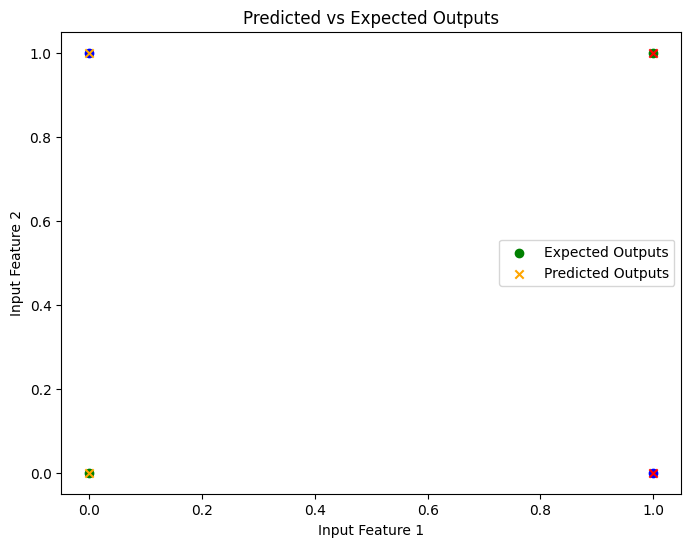

In [18]:
import matplotlib.pyplot as plt
def compute_loss(y, a2):
    m = y.shape[1]
    loss = -np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2)) / m
    return loss

# Training the model
def train_model(X, y, input_size, hidden_size, output_size, epochs, learning_rate):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    
    for epoch in range(epochs):
        # Forward propagation
        z1, a1, z2, a2 = forward_propagation(X, W1, b1, W2, b2)
        
        # Compute the loss
        if epoch % 1000 == 0:
            loss = compute_loss(y, a2)
            print(f"Epoch {epoch}, Loss: {loss}")
        
        # Backward propagation
        W1, b1, W2, b2 = backward_propagation(X, y, z1, a1, z2, a2, W1, b1, W2, b2, learning_rate)
    
    return W1, b1, W2, b2, a2

# Example usage
input_size = 2
hidden_size = 2
output_size = 1
epochs = 10000
learning_rate = 0.1

# Example data (replace with actual data)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # 4 examples with 2 input features
y = np.array([[0, 1, 1, 0]])  # Expected outputs (labels)

# Train the model
W1, b1, W2, b2, output = train_model(X, y, input_size, hidden_size, output_size, epochs, learning_rate)

# Validation
print("\nValidation:")
print("Inputs:\n", X)
print("Predicted Outputs:\n", np.round(output))  # Round predictions to 0 or 1
print("Expected Outputs:\n", y)

# Plotting Predicted Outputs and Expected Outputs vs Inputs
plt.figure(figsize=(8, 6))

# Plot input pairs as 2D points
for i in range(X.shape[1]):
    plt.scatter(X[0, i], X[1, i], color='blue' if y[0, i] == 1 else 'green', label='Expected Outputs' if i == 0 else "")
    plt.scatter(X[0, i], X[1, i], color='red' if np.round(output[0, i]) == 1 else 'orange', marker='x', label='Predicted Outputs' if i == 0 else "")

plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.title('Predicted vs Expected Outputs')
plt.legend()
plt.show()
